# Loan Default Prediction

## Problem Statement

The objective of this project is to build a predictive model that can accurately determine whether a borrower will default on a loan or not. Using historical loan data, we aim to analyze the key factors influencing loan defaults and develop a machine learning model to predict the binary target variable: **Default (1: Defaulted, 0: Not Defaulted)**.

- **Loan_ID**: Unique Loan ID
- **Gender**: Male/ Female
- **Married**: Applicant married (Y/N)
- **Dependents**: Number of dependents
- **Education**: Applicant Education (Graduate/Under Graduate)
- **Self_Employed**: Self employed (Y/N)
- **ApplicantIncome**: Applicant income
- **CoapplicantIncome**: Coapplicant income
- **LoanAmount**: Loan amount in thousands
- **Loan_Amount_Term**: Term of loan in months
- **Credit_History**: Credit history meets guidelines
- **Property_Area**: Urban/ Semi Urban/ Rural
- **Loan_Status**: Loan approved (Y/N)

## Project Goals

1. **Data Preprocessing**:
    - Understand dataset
    - Handle missing values and outliers.
    - Convert categorical features into numerical representations.
    - Standardize numerical features for consistent model performance.
    - Explore correlations among features to understand relationships.

2. **Exploratory Data Analysis (EDA)**:
    - Visualize the distribution of key features such as `Income`, `LoanAmount`, and `CreditScore`.
    - Explore the relationship between features and loan default.
    - Examine the class distribution of the target variable (imbalanced or not).

3. **Feature Engineering**:
    - Engineer new features that may contribute to better prediction accuracy (e.g., `Debt-to-Income Ratio` buckets).
    - Perform feature selection based on correlation analysis, domain knowledge, and model performance.

4. **Modeling**:
    - Experiment with multiple machine learning models such as:
        - Logistic Regression
        - Decision Trees
        - Random Forest
        - Gradient Boosting Machines (GBM)
        - Support Vector Machines (SVM)
    - Tune hyperparameters to optimize performance using cross-validation.

5. **Evaluation Metrics**:
    - Measure model performance using metrics such as:
        - Accuracy
        - Precision
        - Recall
        - F1-score
        - ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
    - Handle any class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting.

## Expected Outcomes

The project aims to deliver a predictive model with a high degree of accuracy in identifying potential loan defaulters. The model will help financial institutions assess borrower risk more effectively, reducing default rates and improving decision-making processes.

## Tools and Technologies

- **Python**: For data analysis and model development.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For model development, evaluation, and tuning.
- **Imbalanced-learn (if needed)**: For dealing with class imbalance.

## Conclusion

By leveraging machine learning models on borrower data, this notebook will predict the likelihood of a borrower defaulting on a loan. Insights gained from this analysis will provide actionable intelligence to stakeholders in the lending space, potentially reducing financial losses due to loan defaults.


----



#### Understanding the Dataset:

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Or to suppress specific warnings (e.g., FutureWarnings)
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Load Datasets

In [2]:
data = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
original_data = data.copy()
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Missing Values Analysis

Analyzing missing values in a dataset is crucial for several reasons:

- **Data Quality**: Identifies columns with missing data, which may affect the quality and reliability of the analysis or model.
- **Data Cleaning**: Helps determine the extent of missing data, guiding decisions on imputation, removal, or other data cleaning methods.
- **Understanding Impact**: Provides insights into the data's completeness, allowing for better interpretation of results and ensuring that conclusions drawn are based on a robust dataset.
- **Model Performance**: Missing values can impact model performance; understanding their distribution helps in applying appropriate preprocessing techniques.

By calculating both the count and percentage of missing values, you gain a clearer picture of the dataset’s integrity and can make informed decisions on how to handle the missing data.


In [7]:
# Calculate missing values and percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Round the percentages and format as strings
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2).astype(str) + '%'
})

print("Missing Data Summary:")
display(missing_summary)

# Identify categorical and numerical features
categorical_features_train = data.select_dtypes(include=['object']).columns.tolist()
categorical_features_test = test.select_dtypes(include=['object']).columns.tolist()

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute categorical features with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_features_train] = imputer_cat.fit_transform(data[categorical_features_train])

# Impute numerical features with median
imputer_num = SimpleImputer(strategy='median')
data[numerical_features] = imputer_num.fit_transform(data[numerical_features])

# Verify missing values after imputation
missing_values_after = data.isnull().sum()
missing_percentage_after = (missing_values_after / len(data)) * 100

# Round the percentages and format as strings
missing_summary_after = pd.DataFrame({
    'Missing Values': missing_values_after,
    'Percentage': missing_percentage_after.round(2).astype(str) + '%'
})

print("\nMissing Data Summary After Imputation:")
display(missing_summary_after)


Missing Data Summary:


,Missing Values,Percentage
Loan_ID,0,0.0%
Gender,13,2.12%
Married,3,0.49%
Dependents,15,2.44%
Education,0,0.0%
Self_Employed,32,5.21%
ApplicantIncome,0,0.0%
CoapplicantIncome,0,0.0%
LoanAmount,22,3.58%
Loan_Amount_Term,14,2.28%



Missing Data Summary After Imputation:


,Missing Values,Percentage
Loan_ID,0,0.0%
Gender,0,0.0%
Married,0,0.0%
Dependents,0,0.0%
Education,0,0.0%
Self_Employed,0,0.0%
ApplicantIncome,0,0.0%
CoapplicantIncome,0,0.0%
LoanAmount,0,0.0%
Loan_Amount_Term,0,0.0%


### Univariate Analysis
Perform univariate analysis by examining each variable individually. For categorical features, frequency tables or bar plots visualize category counts. For numerical variables, Probability Density Functions (PDFs) reveal their distributions.

##### Target Variable

The target variable, Default, is a categorical variable. A frequency table, percentage distribution, and bar plot will be used to analyze it. The frequency table provides the count of each category within the variable.

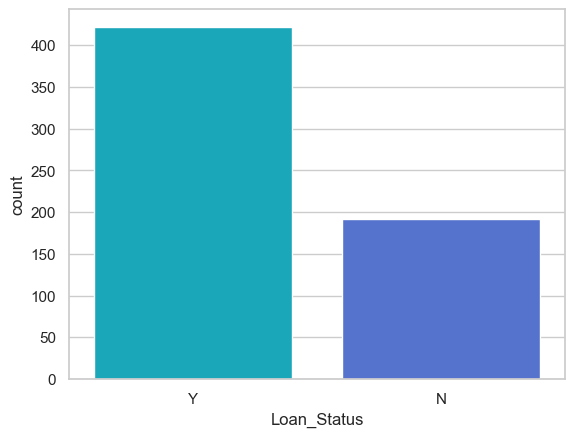

In [8]:
# Set global plot style
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 20  # Title font size
plt.rcParams['legend.fontsize'] = 15  # Legend font size
palette = ['#00bcd4', '#4169e1', '#003366', '#4682b4']  # Cyan, Royal Blue, Navy Blue, Steel Blue

sns.countplot(x = 'Loan_Status', data = data, palette = palette)
plt.show()

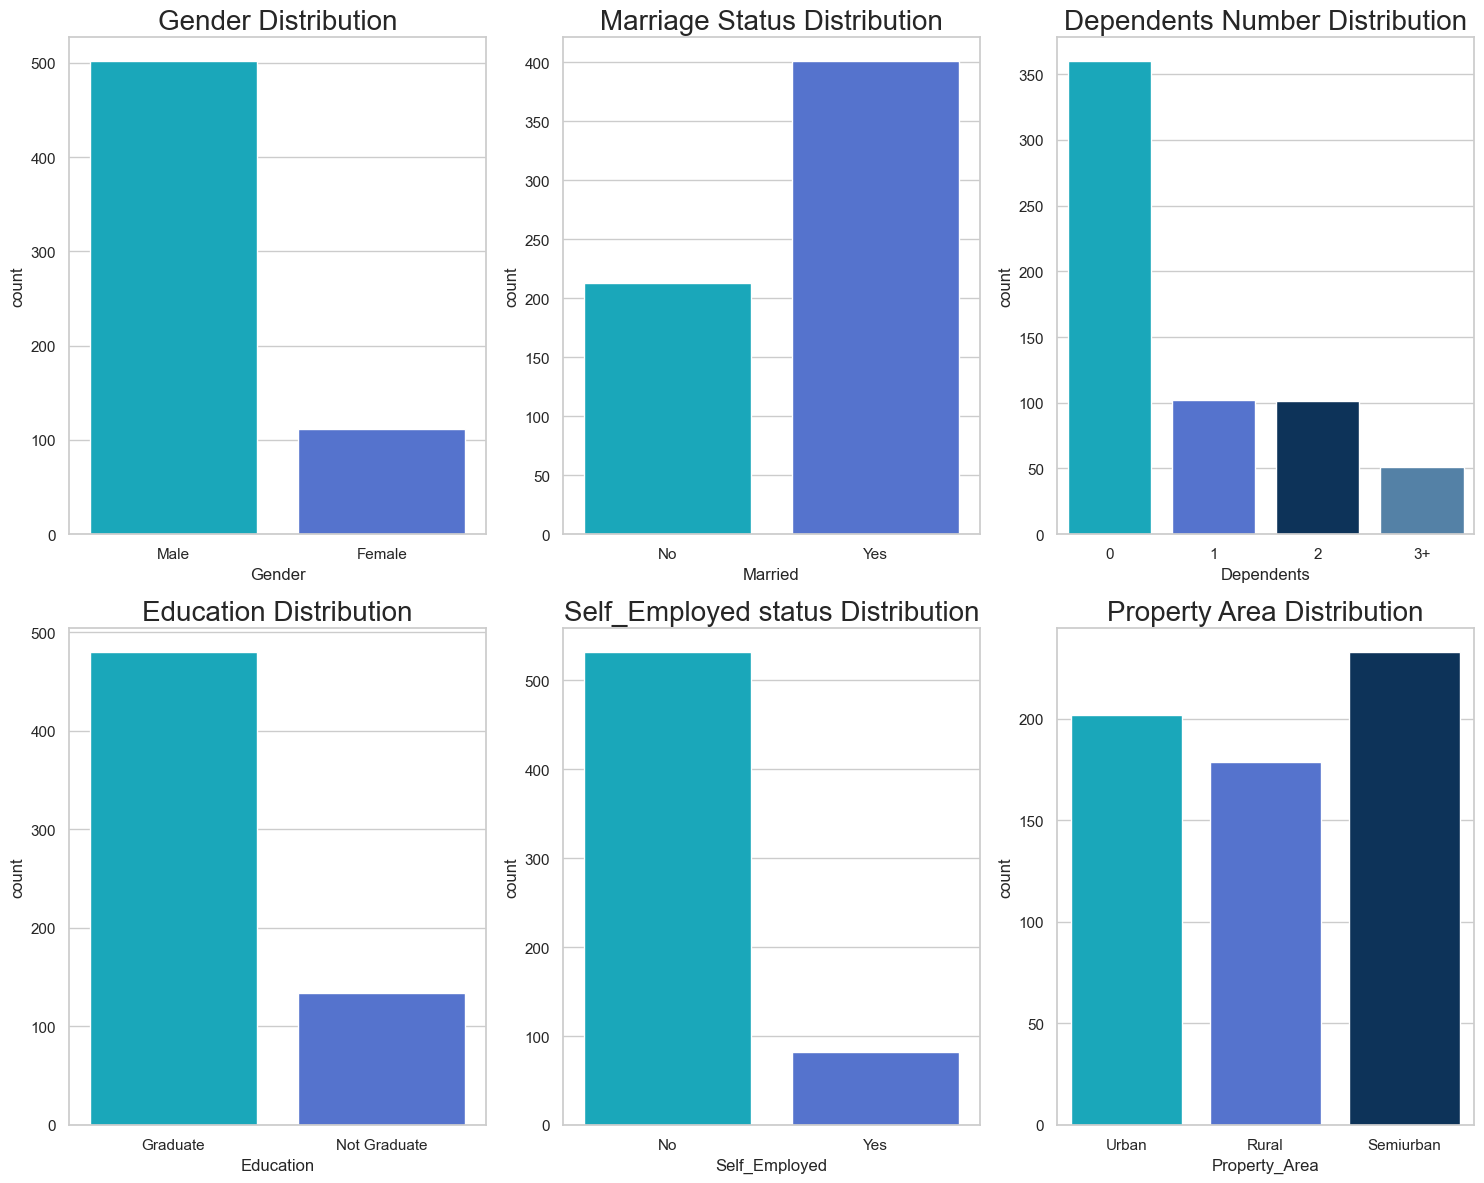

In [9]:
# Univariate Analysis - Categorical Variables
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Nominal variables
sns.countplot(data=data, x='Gender', ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(data=data, x='Married', ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Marriage Status Distribution')

sns.countplot(data=data, x='Dependents', ax=axes[0, 2], palette=palette)
axes[0, 2].set_title('Dependents Number Distribution')

# Binary variables
sns.countplot(data=data, x='Education', ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Education Distribution')

sns.countplot(data=data, x='Self_Employed', ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Self_Employed status Distribution')

sns.countplot(data=data, x='Property_Area', ax=axes[1, 2], palette=palette)
axes[1, 2].set_title('Property Area Distribution')

plt.tight_layout()
plt.show()


In [10]:
print(data['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


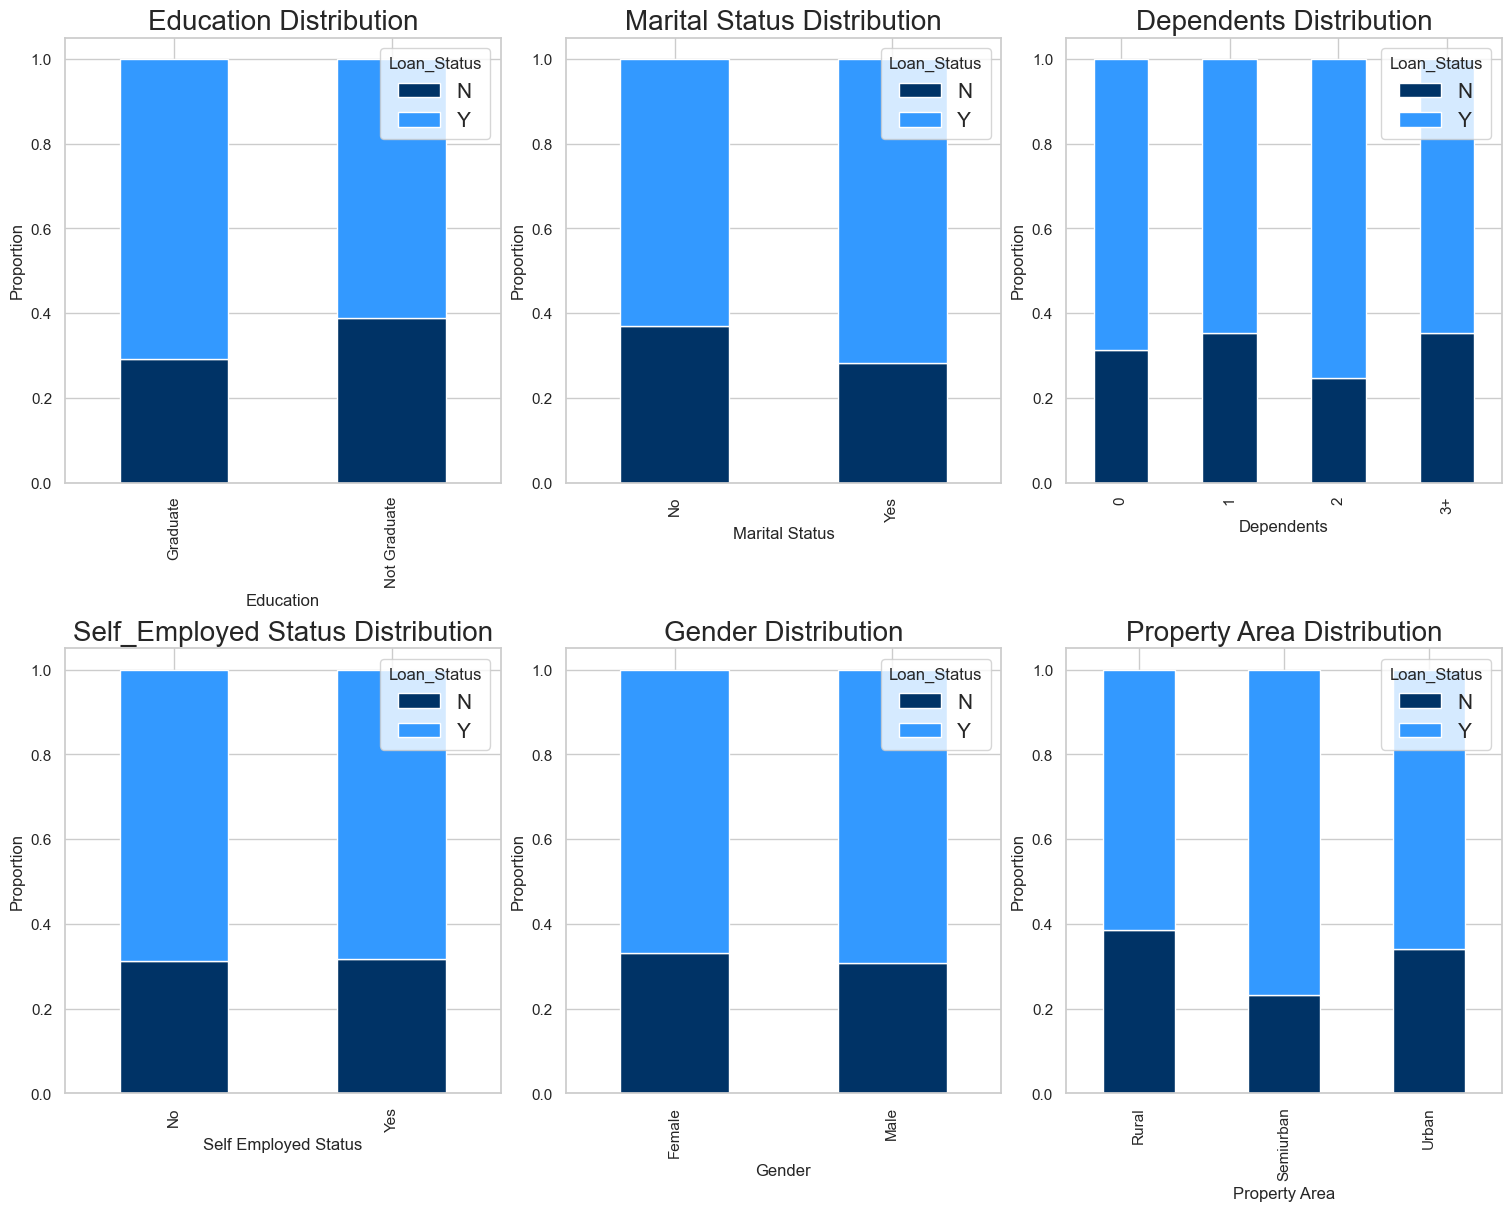

In [11]:
# Calculate crosstabs
Education = pd.crosstab(data['Education'], data['Loan_Status'])
Married = pd.crosstab(data['Married'], data['Loan_Status'])
Dependents = pd.crosstab(data['Dependents'], data['Loan_Status'])
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
Gender = pd.crosstab(data['Gender'], data['Loan_Status'])
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])

# Define the number of rows and columns for the plot grid
num_rows = 2
num_columns = 3

# Create subplots with the updated number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12), constrained_layout=True)

# Define the custom color palette
colors = ['#003366', '#3399FF']  # Navy blue and normal blue

# Plot each cross-tabulation in specified subplot
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 0], color=colors)
axes[0, 0].set_title('Education Distribution')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Proportion')

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 1],color=colors)
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Proportion')

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 2],color=colors)
axes[0, 2].set_title('Dependents Distribution')
axes[0, 2].set_xlabel('Dependents')
axes[0, 2].set_ylabel('Proportion')

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 0],color=colors)
axes[1, 0].set_title('Self_Employed Status Distribution')
axes[1, 0].set_xlabel('Self Employed Status')
axes[1, 0].set_ylabel('Proportion')

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 1],color=colors)
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Proportion')

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 2],color=colors)
axes[1, 2].set_title('Property Area Distribution')
axes[1, 2].set_xlabel('Property Area')
axes[1, 2].set_ylabel('Proportion')

# Remove any unused subplots
# Since there are only 6 plots and we have a 2x3 grid, all subplots are used in this case.
# Ensure no unused subplot remains by deleting extra subplot axes if they exist
for ax in axes.flat:
    if not ax.has_data():  # Check if the axis has data; if not, remove it
        fig.delaxes(ax)

plt.show()

### Numerical Analysis

In this section, various plots are used to explore and understand the numerical features of the dataset.

- **Histograms** reveal the distribution and frequency of individual numerical variables.
- **Box Plots** provide insights into the spread, central tendency, and potential outliers within numerical features.
- **Pair Plots** examine the relationships between pairs of numerical features to identify correlations and interactions.
- **Correlation Heatmaps** visualize the strength and direction of linear relationships between numerical features.

### Analysis Type

The combination of these plots for numerical features extends beyond univariate analysis to include **bivariate** and **multivariate analysis**. Bivariate analysis examines the relationships between two variables, while multivariate analysis explores interactions among multiple variables simultaneously. This holistic approach provides a deeper understanding of the dataset's structure and relationships.

### 1. Histograms

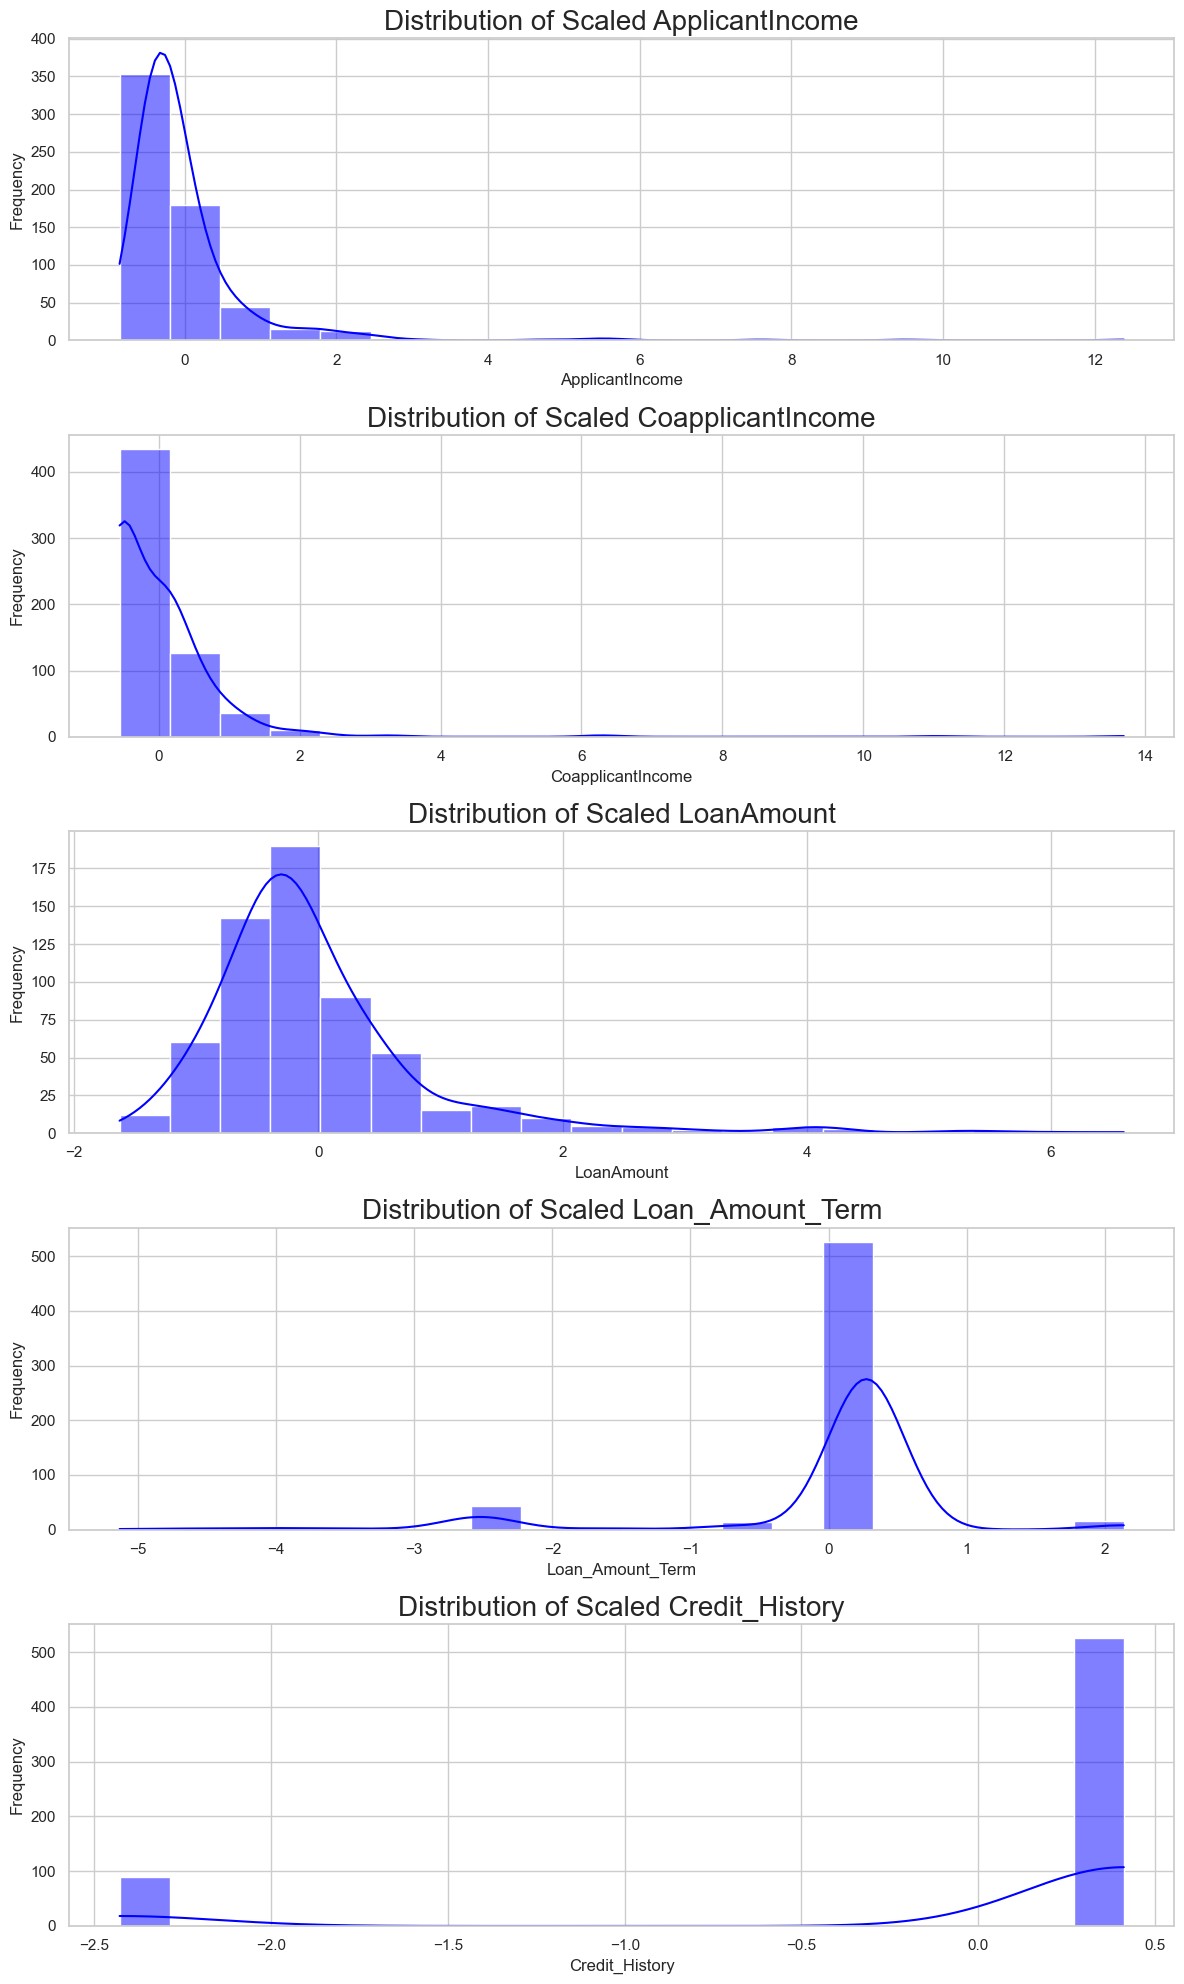

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
numeric_scaled = scaler.fit_transform(data[numerical_features])

# Convert back to a DataFrame
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numerical_features)

# Plot histograms for scaled features
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 4))

for i, feature in enumerate(numerical_features):
    sns.histplot(numeric_scaled_df[feature], bins=20, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of Scaled {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


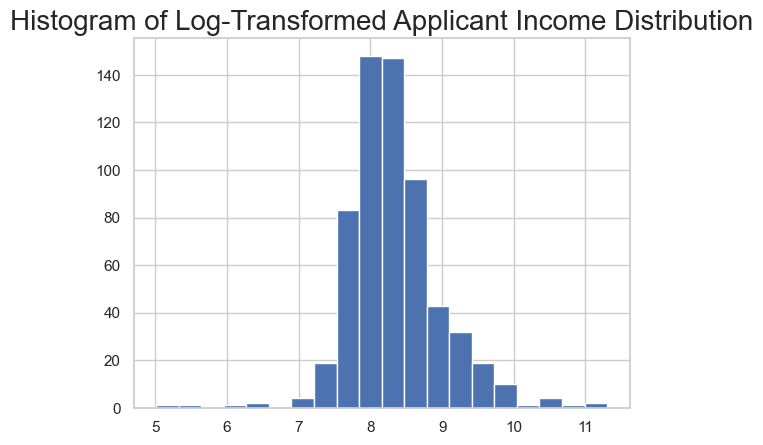

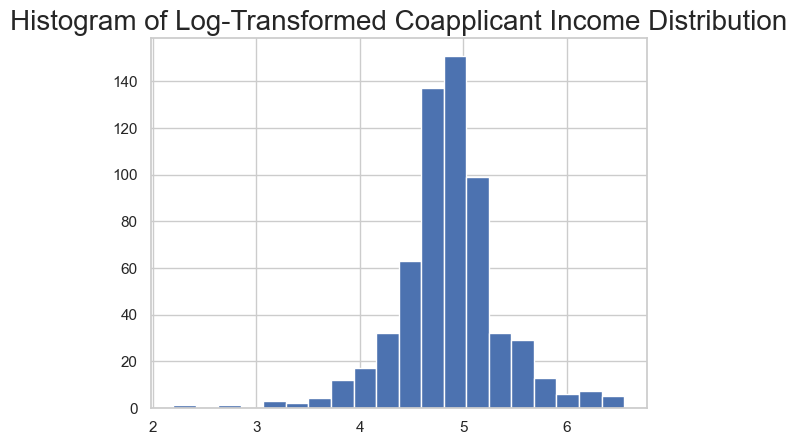

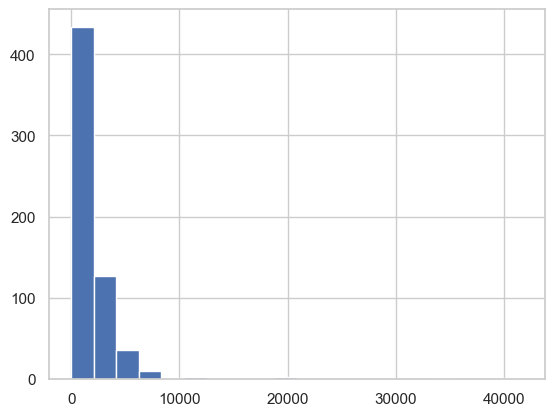

In [13]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome']) 
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['CoapplicantIncome_log'] = np.log(data['CoapplicantIncome'])

data['ApplicantIncome_log'].hist(bins=20) 
plt.title('Histogram of Log-Transformed Applicant Income Distribution')
plt.show()
data['LoanAmount_log'].hist(bins=20)
plt.title('Histogram of Log-Transformed Coapplicant Income Distribution')
plt.show()
data['CoapplicantIncome'].hist(bins=20)
plt.show()

# Drop original features if log-transformed features are preferable
data.drop(['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome'], axis=1, inplace=True)

data['ApplicantIncome_log'] = np.log(test['ApplicantIncome'])
data['LoanAmount_log'] = np.log(test['LoanAmount'])
data['CoapplicantIncome_log'] = np.log(test['CoapplicantIncome'])

test['ApplicantIncome_log'] = np.log(test['ApplicantIncome']) 
test['LoanAmount_log'] = np.log(test['LoanAmount']) 
test['CoapplicantIncome_log'] = np.log(test['CoapplicantIncome'])

# Drop original features if log-transformed features are preferable
test.drop(['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome'], axis=1, inplace=True)

### 2. Box Plots

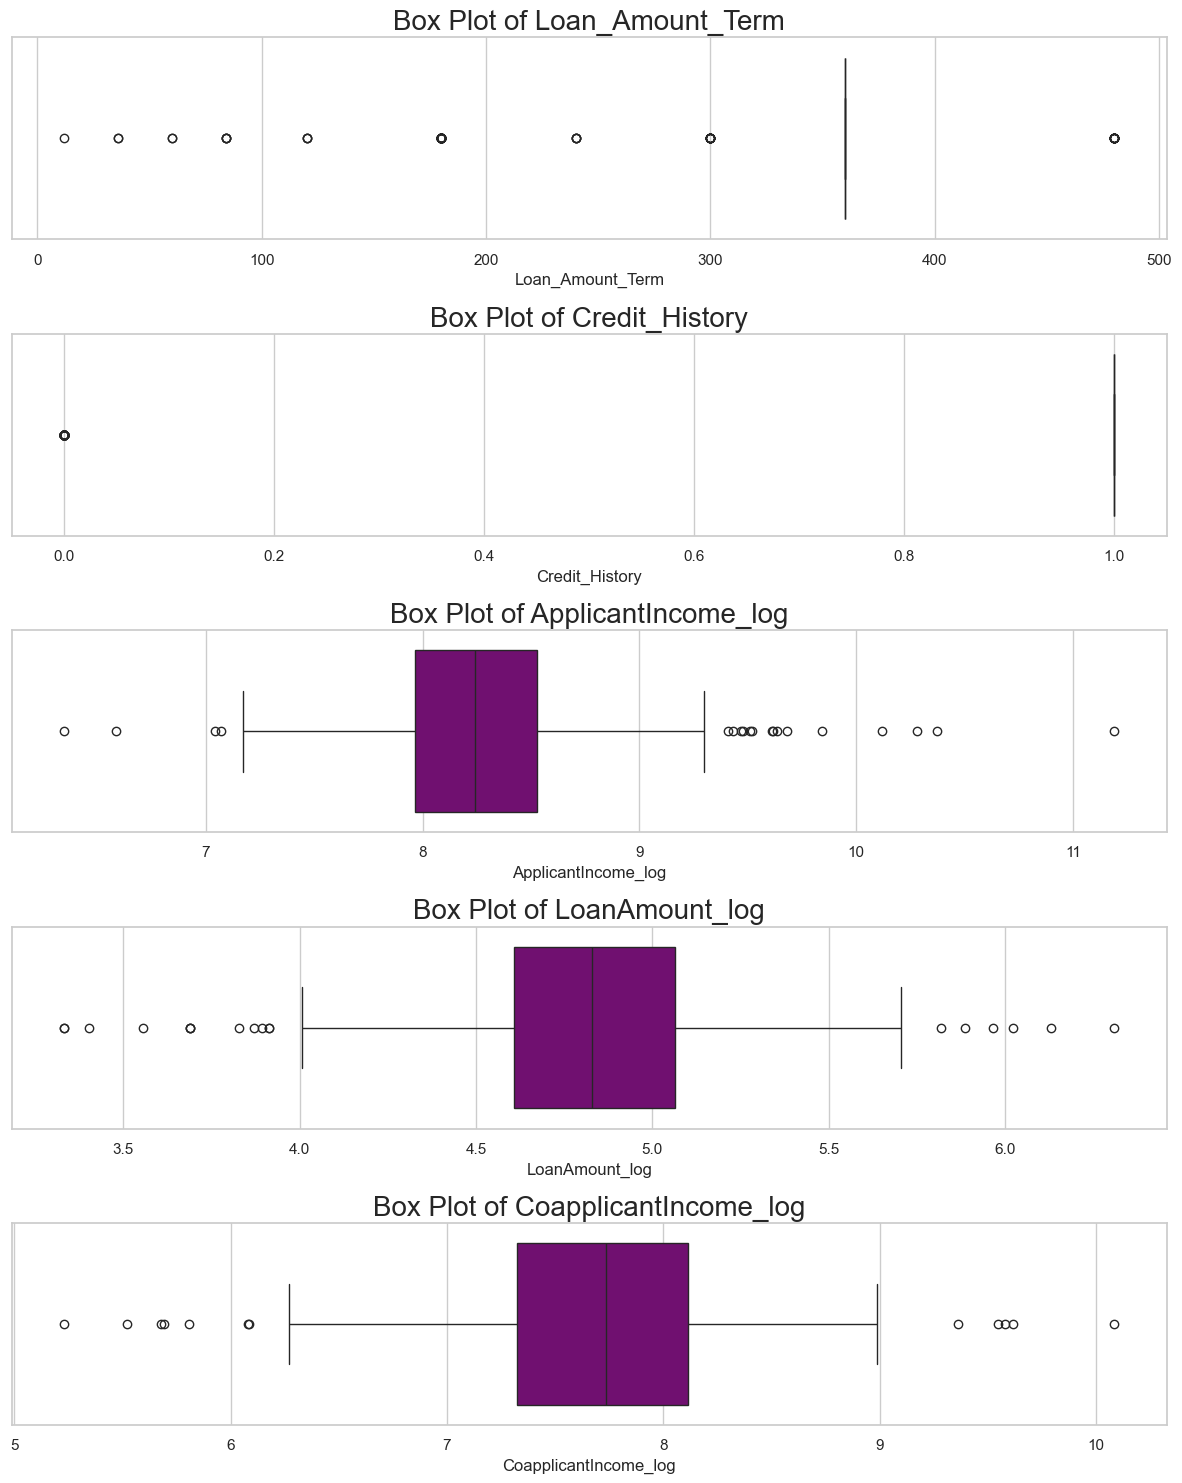

In [14]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Box plots for numerical variables
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 3))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i], color='purple')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

### 3. Pair Plots


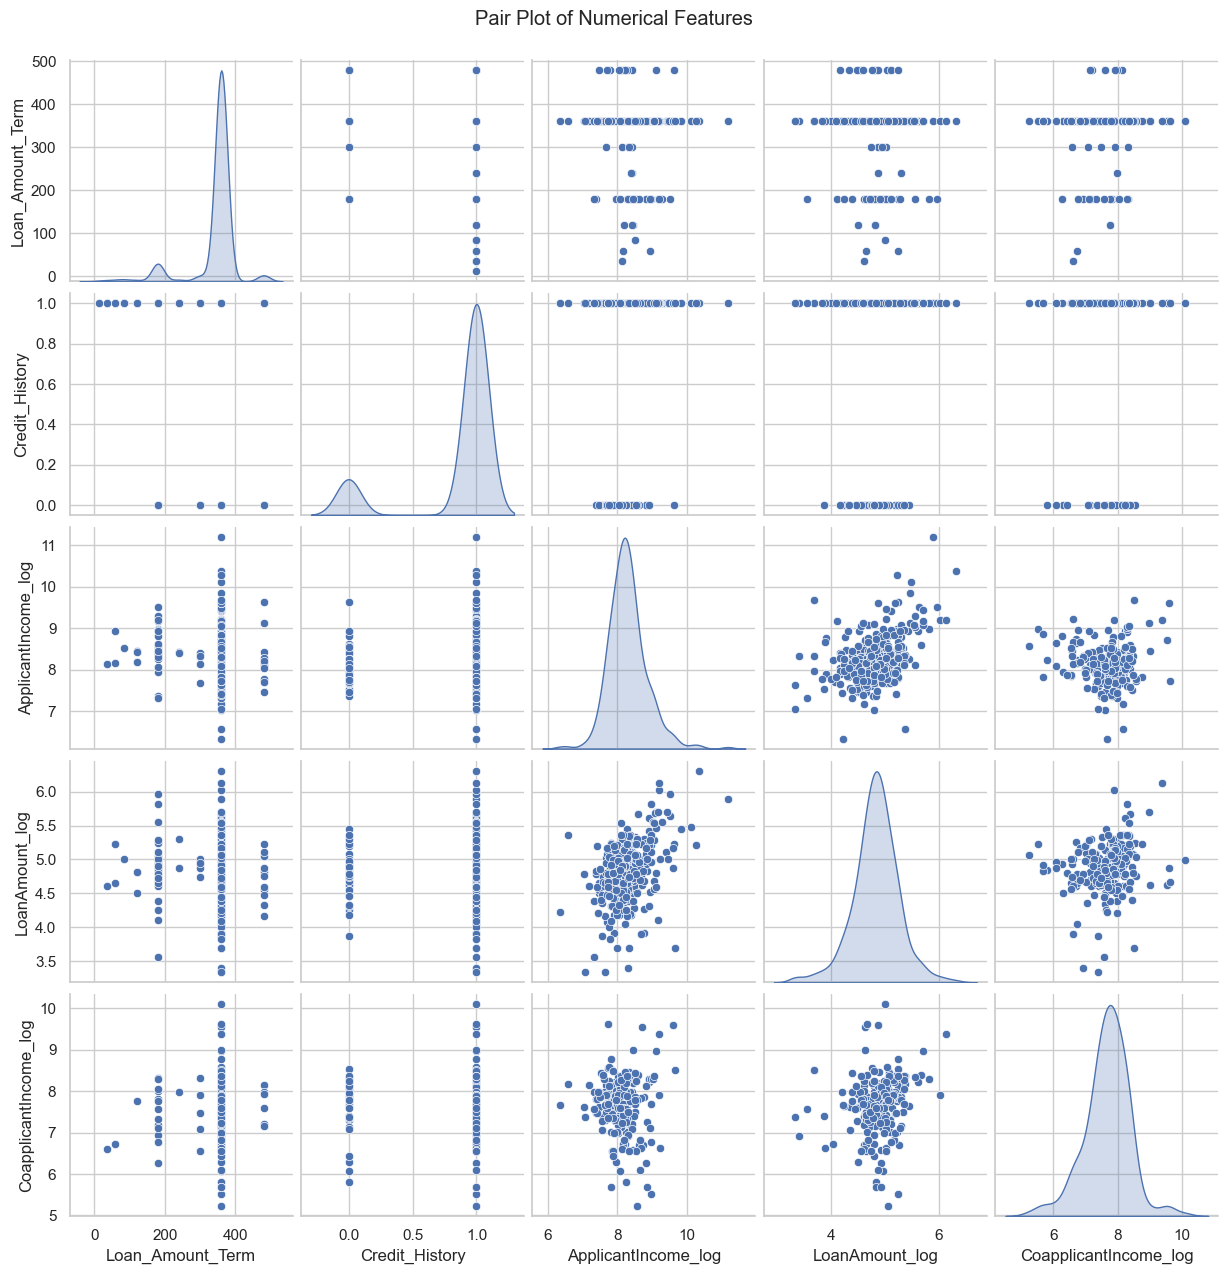

In [15]:
# Pair plots for numerical variables
sns.pairplot(data[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


### 4. Correlation Heatmap


Based on the heatmap below, here are some major deductions:

- A moderate positive correlation of 0.46 between Applicant Income and Loan Amount means that as people’s incomes go up, they generally borrow more money.

- A correlation of 0.19 between Coapplicant Income and Loan Amount shows a weak positive relationship, meaning that slightly higher coapplicant income is associated with a slightly larger loan amount, but the effect is minimal.

- A correlation of 0.12 between Loan Amount Term and Coapplicant Income indicates a very weak positive relationship, suggesting that coapplicant income has only a minimal impact on the length of the loan term.

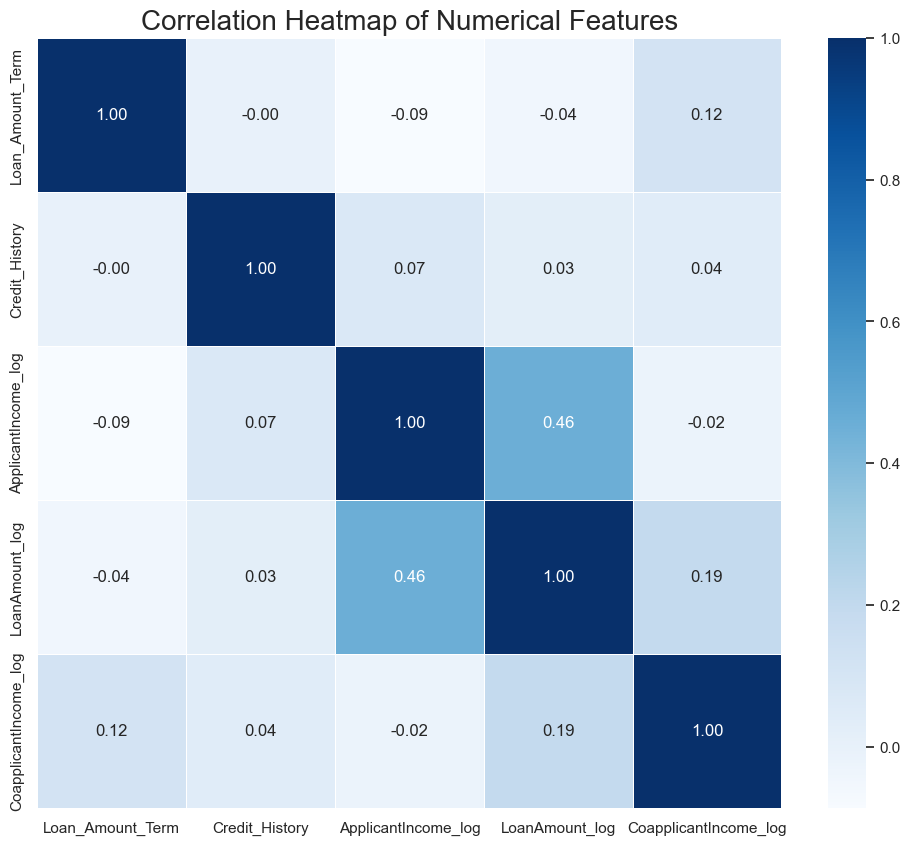

In [16]:
# Compute correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [17]:
data.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log
166,LP001577,Female,Yes,0,Graduate,No,360.0,1.0,Rural,N,7.039660,4.787492,7.609367
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.031385,4.836282,7.313220
185,LP001640,Male,Yes,0,Graduate,Yes,360.0,1.0,Semiurban,Y,8.408048,4.905275,-inf
68,LP001238,Male,Yes,3+,Not Graduate,Yes,60.0,1.0,Urban,Y,8.944550,5.231109,-inf


In [18]:
test.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log
82,LP001445,Male,Yes,2,Not Graduate,No,480.0,0.0,Rural,8.327484,5.003946,-inf
336,LP002853,Female,No,0,Not Graduate,No,360.0,NaN,Urban,8.011355,4.976734,7.600902
220,LP002212,Male,Yes,0,Graduate,No,360.0,NaN,Urban,7.680637,4.682131,7.680637


In [19]:
data['CoapplicantIncome_log'].replace(-np.inf, 0, inplace=True)
data['ApplicantIncome_log'].replace(-np.inf, 0, inplace=True)
data['LoanAmount_log'].replace(-np.inf, 0, inplace=True)

test['CoapplicantIncome_log'].replace(-np.inf, 0, inplace=True)
test['ApplicantIncome_log'].replace(-np.inf, 0, inplace=True)
test['LoanAmount_log'].replace(-np.inf, 0, inplace=True)


# Impute categorical features with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_features_train] = imputer_cat.fit_transform(data[categorical_features_train])
test[categorical_features_test] = imputer_cat.fit_transform(test[categorical_features_test])

# Impute numerical features with median
imputer_num = SimpleImputer(strategy='median')
data[numerical_features] = imputer_num.fit_transform(data[numerical_features])
test[numerical_features] = imputer_num.fit_transform(test[numerical_features])

##### Convert all categorical variables to numeric for modeling:

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Loan_Status' 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Loan_Status'])

# Drop 'Loan_ID' and 'Loan_Status' from the feature set
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
test_loan_id = test['Loan_ID']
test=test.drop('Loan_ID',axis=1)

# Apply One-Hot Encoding to the categorical features
X = pd.get_dummies(X)
test = pd.get_dummies(test)

# Check the sample data
X.sample(5)

,Loan_Amount_Term,Credit_History,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
119,360.0,1.0,6.584791,5.361292,8.163371,True,False,True,False,True,False,False,False,True,False,True,False,False,False,True
298,480.0,1.0,8.223895,4.762174,0.000000,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
225,360.0,1.0,7.841886,4.304065,0.000000,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
75,480.0,1.0,8.183956,5.043425,8.141772,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
556,360.0,1.0,8.239065,4.828314,6.932448,True,False,True,False,True,False,False,False,True,False,True,False,False,False,True


### Modeling

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5)

# Evaluate models using cross-validation
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[model_name] = cv_scores
    print(f"{model_name}: Mean Accuracy = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")


Logistic Regression: Mean Accuracy = 0.8062, Std = 0.0313
Random Forest: Mean Accuracy = 0.7557, Std = 0.0250
SVC: Mean Accuracy = 0.6873, Std = 0.0037
K-Nearest Neighbors: Mean Accuracy = 0.6889, Std = 0.0394
Decision Tree: Mean Accuracy = 0.6646, Std = 0.0356
Naive Bayes: Mean Accuracy = 0.7768, Std = 0.0292
Gradient Boosting Classifier: Mean Accuracy = 0.7867, Std = 0.0433


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [24]:
X_train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_log',
       'LoanAmount_log', 'CoapplicantIncome_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [25]:
test.columns

Index(['Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_log',
       'LoanAmount_log', 'CoapplicantIncome_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [26]:
# Make predictions on the test set
predictions = model.predict(test)

# Create a DataFrame to hold predictions
submission = pd.DataFrame({
    'Loan_ID': test_loan_id,  # Include this if it's part of the submission format
    'Loan_Status': predictions
})

# Save predictions to CSV for submission
submission.to_csv('data/my_submission.csv', index=False)

In [27]:
submission.head(5)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
